<a href="https://colab.research.google.com/github/yuvraj1841/COllab_noteBook/blob/main/Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Change batch size in mini-batch gradient descent.**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

# Create a dataset
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [14]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [24]:
lr = 0.1
lr = 0.1
n_iter = 200
y_pred = np.random.randn(X_b.shape[1], 1)  # Corrected the initialization

# Change the batch size (e.g., set it to 10)
batch_size = 10

# Make sure X and y are defined before running this line
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = minibatch_gradient_descent(X_b, y, y_pred, lr, n_iter, batch_size)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))



y_pred[0]: 4.236
y_pred[1]: 2.782
Final error: 3.899


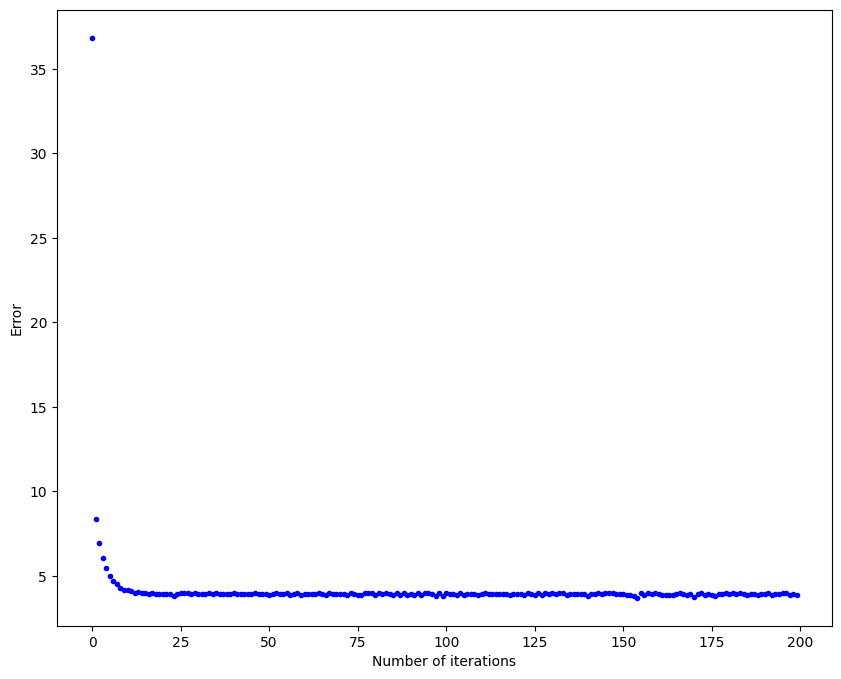

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

**2.Test all the three out on real datasets.**

MSE Batch Gradient Descent: 27987.710613110627
MSE Stochastic Gradient Descent: 28033.12307406179
MSE Minibatch Gradient Descent: 27901.809987975597


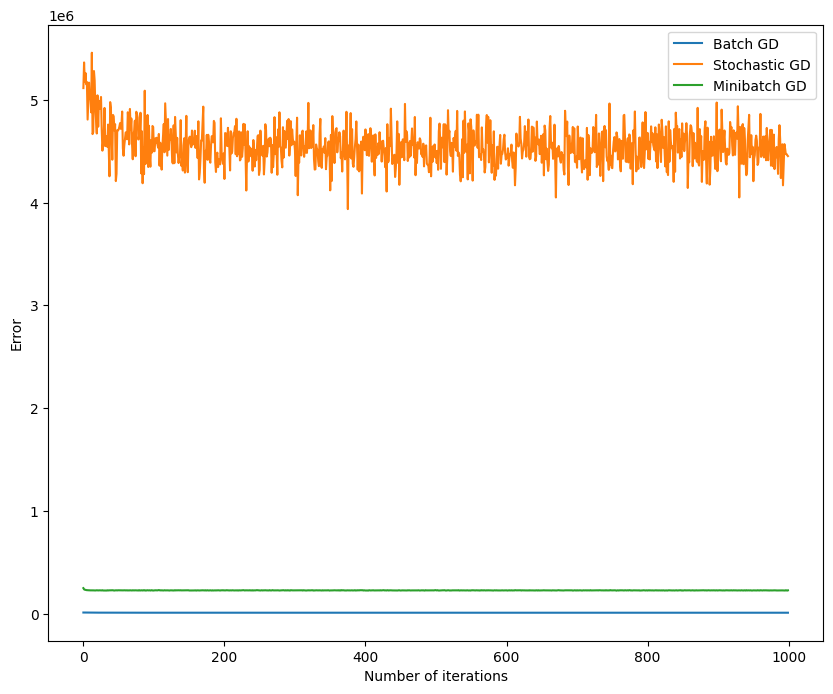

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        errors = prediction - y
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot(errors))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, -1)
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            errors = prediction - y_i

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot(errors))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size, :]
            y_i = y[i: i + batch_size, :]
            prediction = np.dot(X_i, y_pred)
            errors = prediction - y_i

            y_pred = y_pred - (1 / batch_size) * learning_rate * (X_i.T.dot(errors))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Initializations
lr = 0.01
n_iter = 1000
batch_size = 20

y_pred_batch = np.random.randn(X_train.shape[1], 1)
y_pred_stochastic = np.random.randn(X_train.shape[1], 1)
y_pred_minibatch = np.random.randn(X_train.shape[1], 1)

# Batch Gradient Descent
y_pred_batch, cost_history_batch = batch_gradient_descent(X_train, y_train, y_pred_batch, lr, n_iter)

# Stochastic Gradient Descent
y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_train, y_train, y_pred_stochastic, lr, n_iter)

# Minibatch Gradient Descent
y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_train, y_train, y_pred_minibatch, lr, n_iter, batch_size)

# Evaluate on the test set
def evaluate(X_test, y_test, y_pred):
    y_pred_test = X_test.dot(y_pred)
    mse = np.mean((y_pred_test - y_test)**2)
    return mse

mse_batch = evaluate(X_test, y_test, y_pred_batch)
mse_stochastic = evaluate(X_test, y_test, y_pred_stochastic)
mse_minibatch = evaluate(X_test, y_test, y_pred_minibatch)

print('MSE Batch Gradient Descent:', mse_batch)
print('MSE Stochastic Gradient Descent:', mse_stochastic)
print('MSE Minibatch Gradient Descent:', mse_minibatch)

# Plot cost over iterations
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history_batch, label='Batch GD')
ax.plot(range(n_iter), cost_history_stochastic, label='Stochastic GD')
ax.plot(range(n_iter), cost_history_minibatch, label='Minibatch GD')

ax.legend()
plt.show()


**3.Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.**

In [28]:
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [29]:
def batch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        errors = prediction - y
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot(errors))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

In [30]:
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, -1)
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)
            errors = prediction - y_i

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot(errors))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

In [31]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size, :]
            y_i = y[i: i + batch_size, :]
            prediction = np.dot(X_i, y_pred)
            errors = prediction - y_i

            y_pred = y_pred - (1 / batch_size) * learning_rate * (X_i.T.dot(errors))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history


In [32]:
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-28-a67f291e0fa2>:4: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))


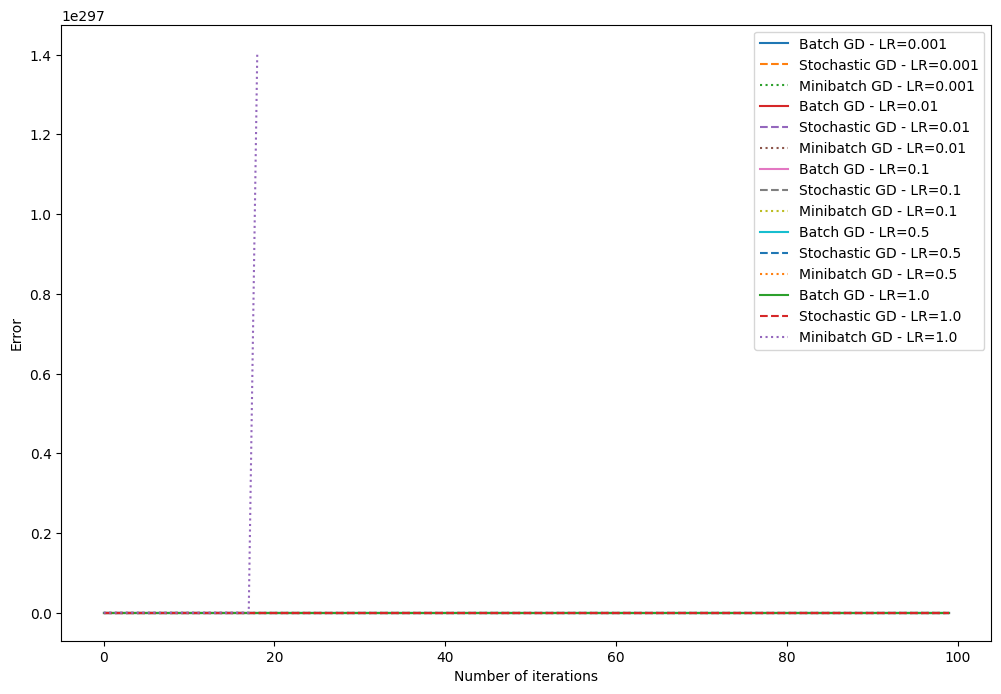

In [36]:
lr = 0.01
n_iter = 100

# Initializations
y_pred_batch = np.random.randn(X_train.shape[1], 1)
y_pred_stochastic = np.random.randn(X_train.shape[1], 1)
y_pred_minibatch = np.random.randn(X_train.shape[1], 1)

# Arrays to store results
cost_history_batch_all = []
cost_history_stochastic_all = []
cost_history_minibatch_all = []

# Learning rate variations
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
for lr in learning_rates:
    # Batch Gradient Descent
    y_pred_batch, cost_history_batch = batch_gradient_descent(X_train, y_train, y_pred_batch, lr, n_iter)
    cost_history_batch_all.append(cost_history_batch)

    # Stochastic Gradient Descent
    y_pred_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_train, y_train, y_pred_stochastic, lr, n_iter)
    cost_history_stochastic_all.append(cost_history_stochastic)

    # Minibatch Gradient Descent
    y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X_train, y_train, y_pred_minibatch, lr, n_iter)
    cost_history_minibatch_all.append(cost_history_minibatch)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
for i, lr in enumerate(learning_rates):
    ax.plot(range(n_iter), cost_history_batch_all[i], label=f'Batch GD - LR={lr}')
    ax.plot(range(n_iter), cost_history_stochastic_all[i], label=f'Stochastic GD - LR={lr}', linestyle='dashed')
    ax.plot(range(n_iter), cost_history_minibatch_all[i], label=f'Minibatch GD - LR={lr}', linestyle='dotted')

ax.legend()
plt.show()
